# cartopy maps

You might be slightly disappointed with your map plots so far. They all look the same and you can't use any fancy projections to stand out. We are going to change this now with the `cartopy` package. And it is really easy to implement!

## From matplotlib's `axes` to cartopy's `GeoAxes`
Let's recall how we created a figure so far with `matplotlib`:

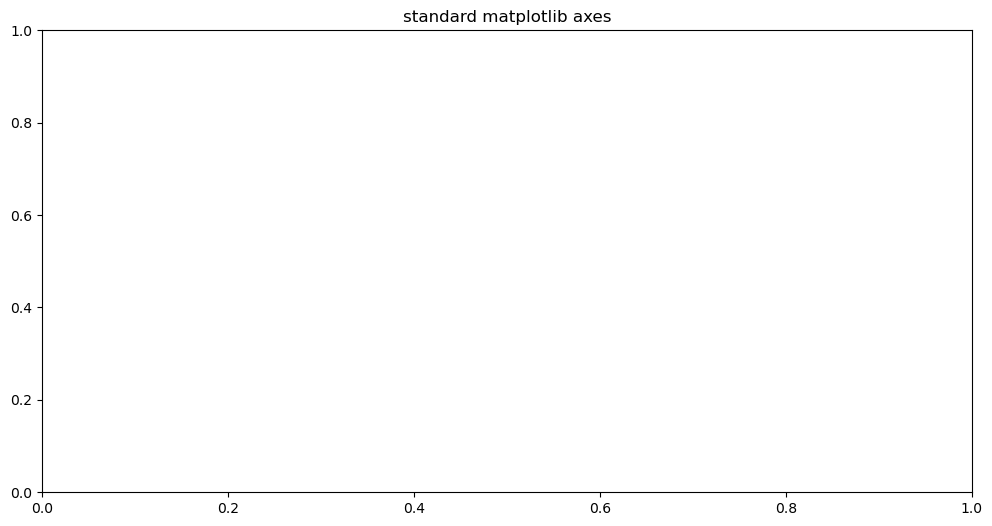

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()
ax.set_title("standard matplotlib axes");

`cartopy` now allows us to load any projection from its coordinate reference system class `ccrs` and *georeference* the `axes` to become a `GeoAxes`.

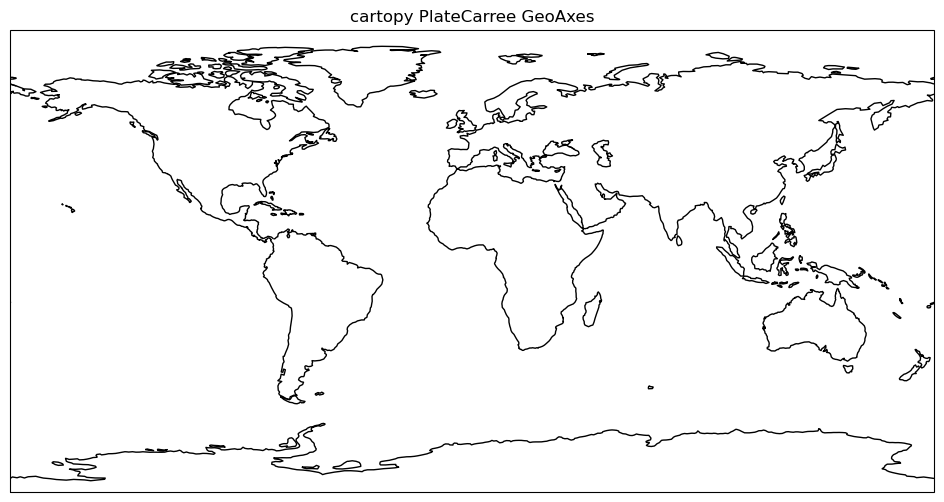

In [30]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
# ax is now of type GeoAxes with some helpful options like adding coastlines
ax.coastlines()
ax.set_title("cartopy PlateCarree GeoAxes");

we can easily add some more shapefiles to quickly produce nice maps

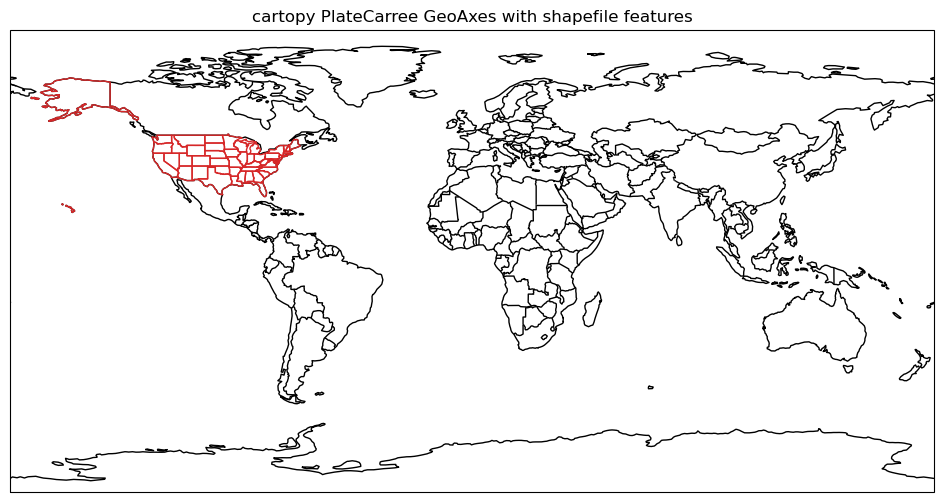

In [42]:
from cartopy import feature as cfeature

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()

# imported from the cartopy feature class
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='tab:red')

ax.set_title("cartopy PlateCarree GeoAxes with shapefile features");

## cartopy projections
Changing the projection in `cartopy` is as easy as just importing a different projection name from the ccrs class. 

A list of available projections and examples is available at https://scitools.org.uk/cartopy/docs/latest/reference/projections.html.

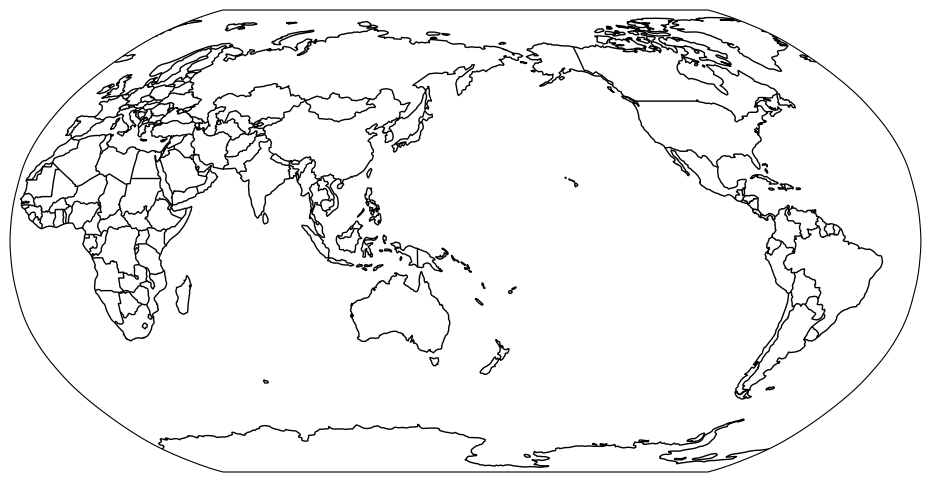

In [72]:
# it is common practice to save the projection as an object first so we can use it multiple times
crs = ccrs.Robinson(central_longitude=160)

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.coastlines()

easily add a stock background image:

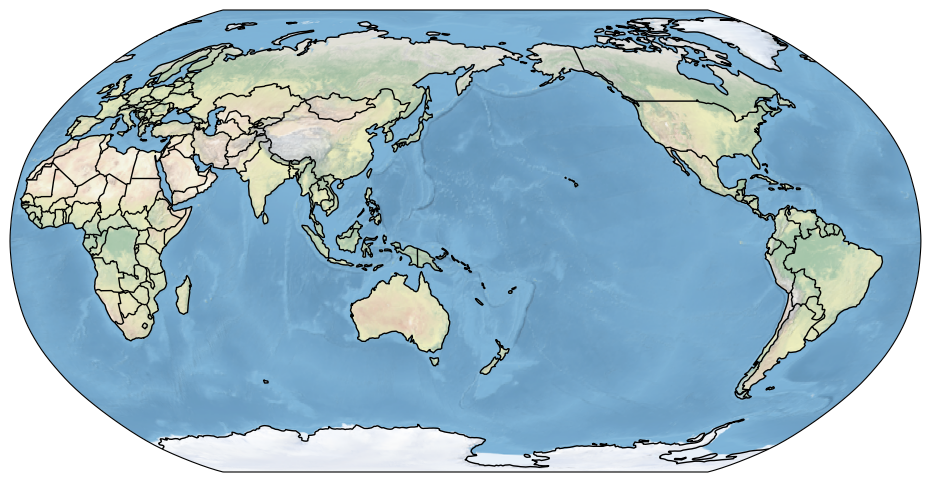

In [73]:
crs = ccrs.Robinson(central_longitude=160)

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.coastlines()
ax.stock_img()

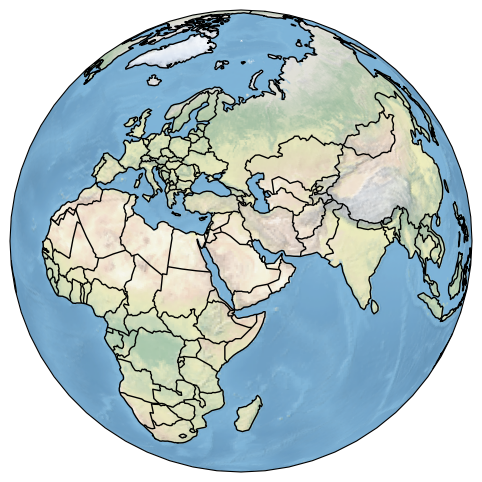

In [106]:
crs = ccrs.Orthographic(central_longitude=45, central_latitude=30)

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.coastlines()
ax.stock_img()

## regional maps
We can zoom in on any map with the [.set_extent()](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html) method for any GeoAxes. The extent needs to be specified as (x0, x1, y0, y1).

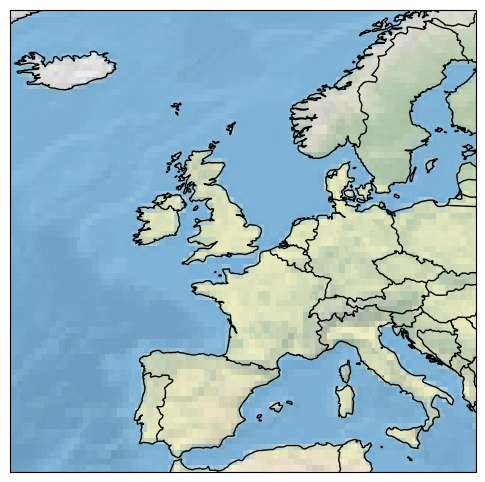

In [107]:
crs = ccrs.Robinson()

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.coastlines()
ax.stock_img()

# need to specify in which crs we specify the extent (here in degrees)
ax.set_extent([-20, 20, 35, 70], crs=ccrs.PlateCarree())


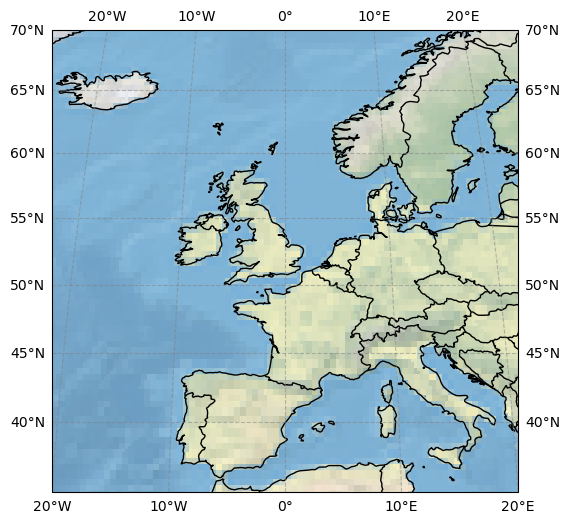

In [108]:
crs = ccrs.Robinson()

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.coastlines()
ax.stock_img()

# need to specify in which crs we specify the extent (here degrees)
ax.set_extent([-20, 20, 35, 70], crs=ccrs.PlateCarree())

# lets add some labels (this does not always work with all projections)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')

## cartopy and xarray
Using `cartopy` projections for our `xarray` plots is also straightforward. The only thing we have to remember is to also specify the projection/crs of our data grid that we want to plot. 

Let's load the MERRA-2 aerosol data again to demonstrate this:

In [102]:
import xarray as xr
ds = xr.open_dataset("../assets/MERRA2_aer_total_colum_mass_2021-2022.nc")

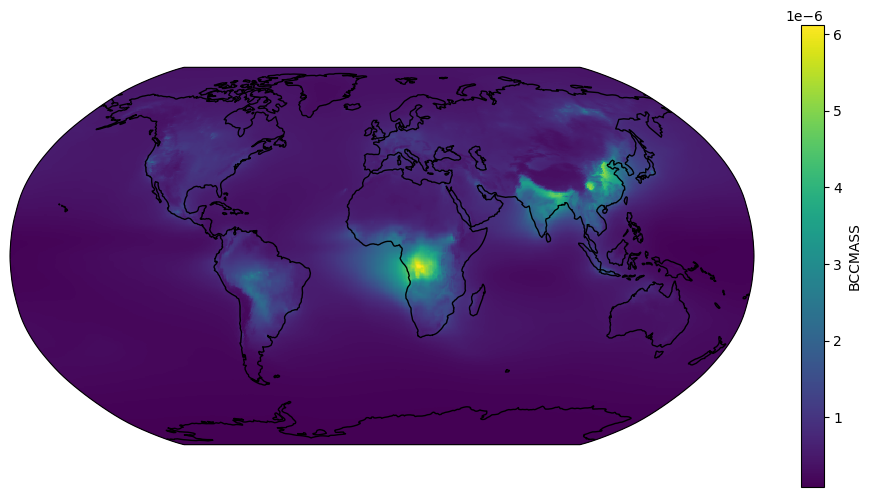

In [105]:
# this is the projection we want to plot
crs = ccrs.Robinson()
fig, ax = plt.subplots(subplot_kw=dict(projection=crs))

# this is the projection of the data grid
ds.BCCMASS.mean('time').plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

### Exercise 5
> - create your first map with cartopy and try some of the different projections
> - load any of the netCDF files we worked with this week and use cartopy to change the projection of your xarray plots
> - try yo create four subplots all showing the same data but with four different projections
> - have alook at [this tutorial](https://www.kaggle.com/code/ukveteran/cartopy-and-geopandas-masterclass-jma/notebook) and try to use cartopy with your geopandas plot from exercise 2

## Practice at home:
Congratulations if you have made it so far! I hope you had some fun in learing about (some of) the possibilities of Python handling spatial data. The assessment next week will involve quite a lot of working with `xarray`. So, if you want to practive some more at home I would recommend to take another look at the "Earth and Environmental Data Science Book" by Ryan Abernathey available at https://earth-env-data-science.github.io/intro.html. The previous `xarray` exercise is from his book and he also has a second, more advanced one in this online version. Plus, there are a lot of great tutorials about the most important topics in environmental data analysis. 

## [[Previous: xarray fundamentals exercise¶](./05-xarray_exercise.ipynb)]